In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
# one-hot encoding
from tensorflow.keras.utils import to_categorical
# use ImageDataGenerator for image augmentations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Let's configure all random numbers generators to support determinism and obtain reproducible results.

In [2]:
# settings for reproducibility
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

## Import the Data
The CIFAR10 dataset comes bundled with Keras. We will use the load_data function to load it into memory

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Explore the Data
Check out the number of images in training and test data and also the number of classes and some sample images

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

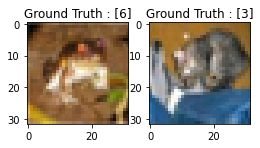

In [4]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


## Preprocess the Data
Perform normalization of data and convert the labels to categorical variables to be used in Keras

In [5]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Define the Model
Create the model with conv layer, max pooling layer, dropout layer and Dense layer

In [7]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

## Train the model

In [8]:
# Initialize the model
model1 = createModel()

# Set training process params
batch_size = 256
epochs = 50

# Set the training configurations: optimizer, loss function, accuracy metrics
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# View model architecture
model1.summary()

history = model1.fit(train_data,
                     train_labels_one_hot,
                     batch_size=batch_size, 
                     epochs=epochs, verbose=1, 
                     validation_data=(test_data, test_labels_one_hot)
          )

# Check the model results on the test set
model1.evaluate(test_data, test_labels_one_hot)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

Epoch 39/50
50000/50000 [==============================] - 4s 72us/sample - loss: 0.5027 - accuracy: 0.8275 - val_loss: 0.6639 - val_accuracy: 0.7911
Epoch 40/50
50000/50000 [==============================] - 4s 72us/sample - loss: 0.4997 - accuracy: 0.8274 - val_loss: 0.6484 - val_accuracy: 0.7975
Epoch 41/50
50000/50000 [==============================] - 4s 72us/sample - loss: 0.4995 - accuracy: 0.8273 - val_loss: 0.6232 - val_accuracy: 0.8024
Epoch 42/50
50000/50000 [==============================] - 4s 73us/sample - loss: 0.4914 - accuracy: 0.8293 - val_loss: 0.6351 - val_accuracy: 0.7940
Epoch 43/50
50000/50000 [==============================] - 4s 72us/sample - loss: 0.4943 - accuracy: 0.8300 - val_loss: 0.6292 - val_accuracy: 0.8029
Epoch 44/50
50000/50000 [==============================] - 4s 73us/sample - loss: 0.4885 - accuracy: 0.8313 - val_loss: 0.6878 - val_accuracy: 0.7895
Epoch 45/50
50000/50000 [==============================] - 4s 73us/sample - loss: 0.4838 - accuracy:

[0.7410173261880875, 0.7873]

## Check the loss and accuracy curves

Text(0.5, 1.0, 'Loss Curves')

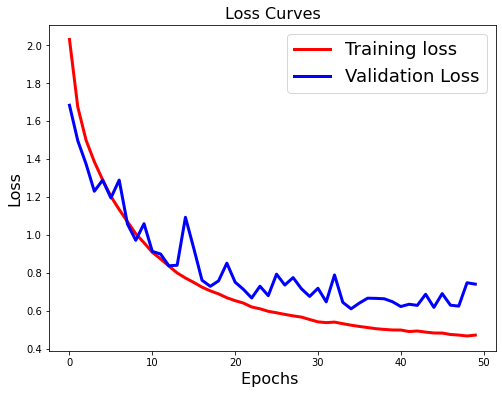

In [9]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

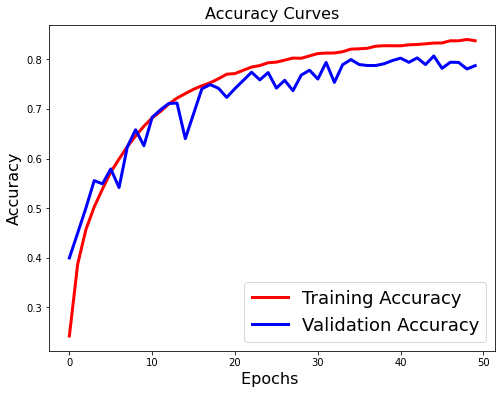

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Train using Data Augmentation
Here we use the ImageDataGenerator class in Keras to perform Data Augmentation. We perform horizontal and vertical shift of the image and also flipping the image randomly.

In [11]:
# Initialize the model
model2 = createModel()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Set training process params
batch_size = 256
epochs = 50

# Define transformations for train data
datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                      steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                      epochs=epochs,
                      validation_data=(test_data, test_labels_one_hot),
                      workers=4
           )

model2.evaluate(test_data, test_labels_one_hot)

  ...
    to  
  ['...']
Train for 196 steps, validate on 10000 samples
Epoch 1/50
196/196 [==============================] - 18s 92ms/step - loss: 2.0901 - accuracy: 0.2275 - val_loss: 1.7710 - val_accuracy: 0.3771
Epoch 2/50
196/196 [==============================] - 18s 93ms/step - loss: 1.7978 - accuracy: 0.3535 - val_loss: 1.5164 - val_accuracy: 0.4525
Epoch 3/50
196/196 [==============================] - 18s 93ms/step - loss: 1.6011 - accuracy: 0.4193 - val_loss: 1.5116 - val_accuracy: 0.4522
Epoch 4/50
196/196 [==============================] - 18s 91ms/step - loss: 1.4712 - accuracy: 0.4683 - val_loss: 1.3684 - val_accuracy: 0.5023
Epoch 5/50
196/196 [==============================] - 18s 91ms/step - loss: 1.3737 - accuracy: 0.5059 - val_loss: 1.2774 - val_accuracy: 0.5390
Epoch 6/50
196/196 [==============================] - 18s 92ms/step - loss: 1.2986 - accuracy: 0.5356 - val_loss: 1.1253 - val_accuracy: 0.5994
Epoch 7/50
196/196 [==============================] - 19s 95ms/s

[0.5812764809608459, 0.8053]

Text(0.5, 1.0, 'Loss Curves')

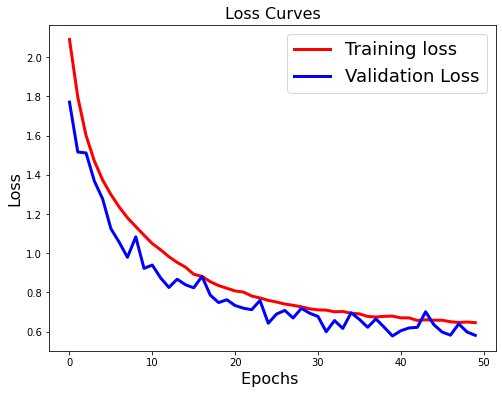

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

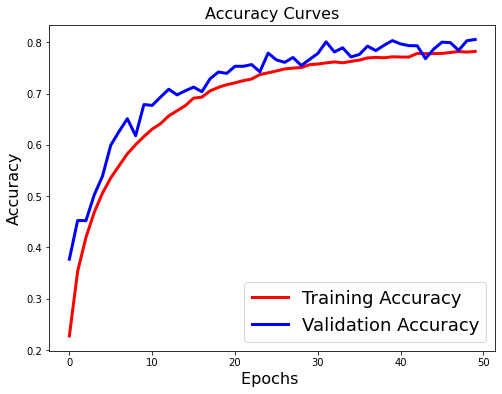

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)